In [11]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset. Replace 'titanic.csv' with your own dataset file for your project.
# Ensure the dataset file exists and is in the same directory as this jupyter notebook.
airlines_flights_df = pd.read_csv('airlines_flights_data.csv')

# Display the first few rows of the dataframe to ensure it is loaded correctly
display(airlines_flights_df.head())

airlines_flights_df.describe()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


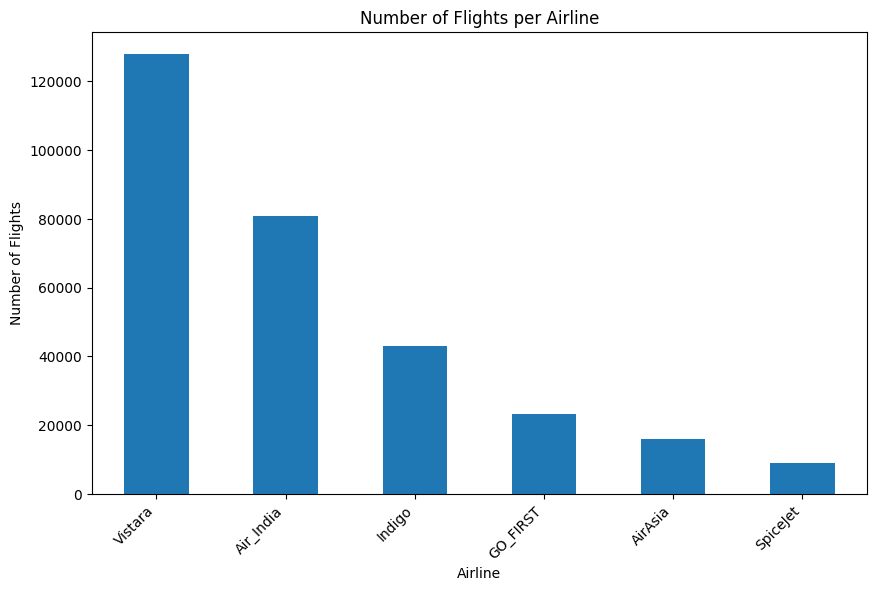

In [8]:
airlines_flights_df.airline.value_counts()

# Create bar graph
airline_counts = airlines_flights_df.airline.value_counts()

airline_counts.plot(kind="bar", figsize=(10, 6))
plt.title("Number of Flights per Airline")
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45, ha = 'right')
plt.show()


In [12]:
airlines_flights_df.departure_time.value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

Text(0.5, 1.0, 'Departure Time Comparison')

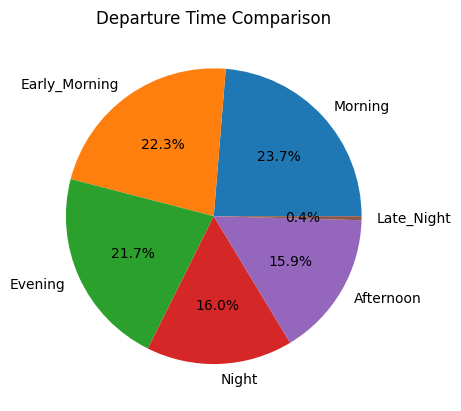

In [ ]:
departure_time_counts = airlines_flights_df.departure_time.value_counts()
plt.pie(
    departure_time_counts,
    labels=departure_time_counts.index,       # airline names
    autopct='%1.1f%%'                 # percentage format
)
plt.title("Departure Time Comparison")


In [21]:
airlines_flights_df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

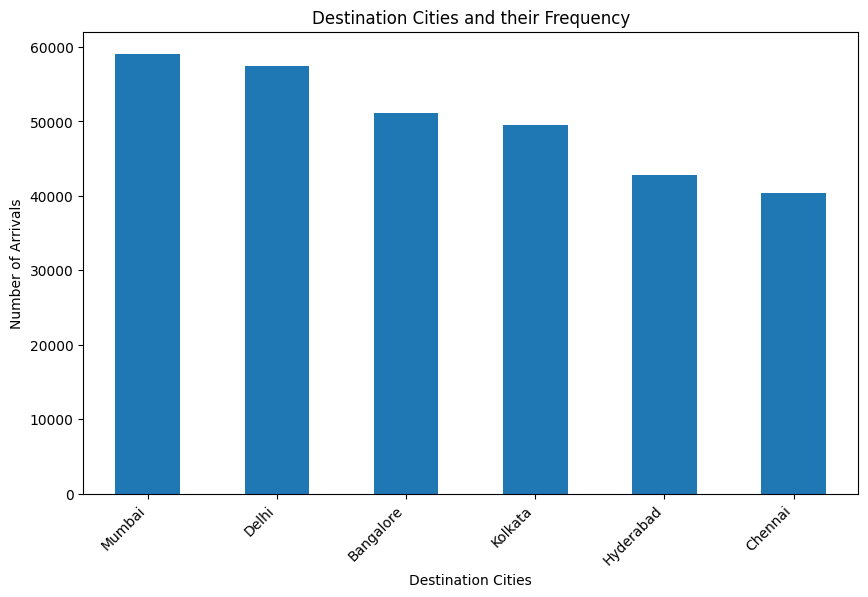

In [22]:
destination_counts = airlines_flights_df.destination_city.value_counts()

# Create bar graph
destination_counts.plot(kind="bar", figsize=(10, 6))
plt.title("Destination Cities and their Frequency")
plt.xlabel("Destination Cities")
plt.ylabel("Number of Arrivals")
plt.xticks(rotation=45, ha = 'right')
plt.show()

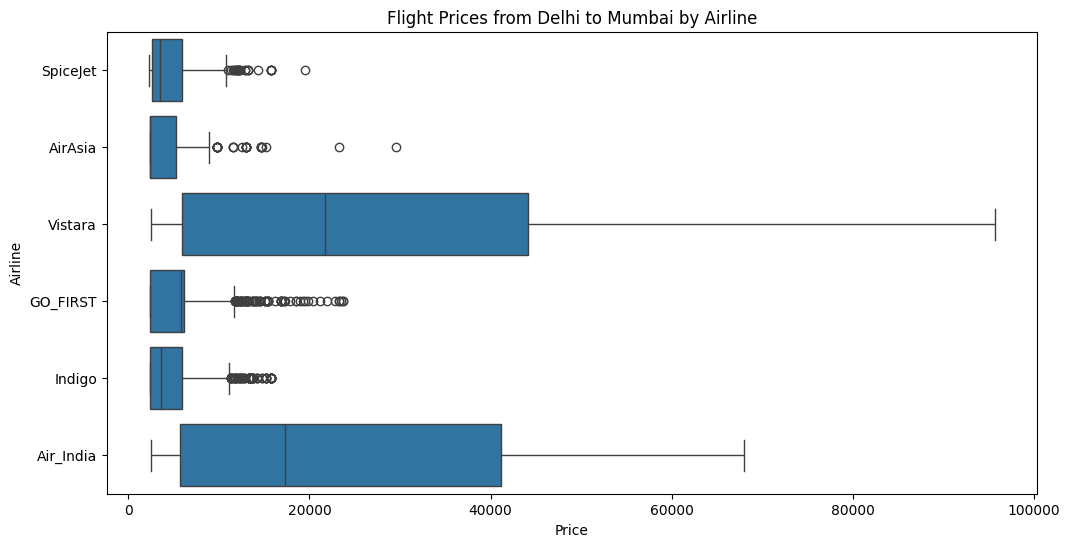

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter flights from Delhi to Mumbai
delhi_mumbai_flights = airlines_flights_df[
    (airlines_flights_df['source_city'] == 'Delhi') &
    (airlines_flights_df['destination_city'] == 'Mumbai')
]

# Make the boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='price', y='airline', data=delhi_mumbai_flights)

# Add labels and title
plt.title("Flight Prices from Delhi to Mumbai by Airline")
plt.xlabel("Price")
plt.ylabel("Airline")
plt.show()


In [2]:
time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'] 
airlines_flights_df['departure_time'] = pd.Categorical(
    airlines_flights_df['departure_time'],
    categories=time_order,
    ordered=True
)

avg_price_pivot = airlines_flights_df.pivot_table(
    index='airline',              # rows
    columns='departure_time',      # columns
    values='price',               # values to aggregate
    aggfunc='mean'                # aggregation function
)
print(avg_price_pivot)

departure_time  Early_Morning       Morning     Afternoon       Evening  \
airline                                                                   
AirAsia           4527.002979   4132.566865   4342.759584   4058.764561   
Air_India        23346.060200  21747.785007  23789.167617  23366.248792   
GO_FIRST          5659.073079   6500.995870   5482.280858   5604.052610   
Indigo            5203.600440   5904.384736   5666.364943   4813.684870   
SpiceJet          5813.590543   6894.052008   7720.376362   5720.595273   
Vistara          30021.534979  30608.385707  28656.015157  31081.607169   

departure_time         Night    Late_Night  
airline                                     
AirAsia          3343.718239   4183.125874  
Air_India       25968.716429  26479.151203  
GO_FIRST         4861.946995   4806.554795  
Indigo           4324.235380   4317.195592  
SpiceJet         5533.119481           NaN  
Vistara         31029.404964           NaN  


C:\Users\ericz\AppData\Local\Temp\ipykernel_16300\2887559760.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  avg_price_pivot = airlines_flights_df.pivot_table(


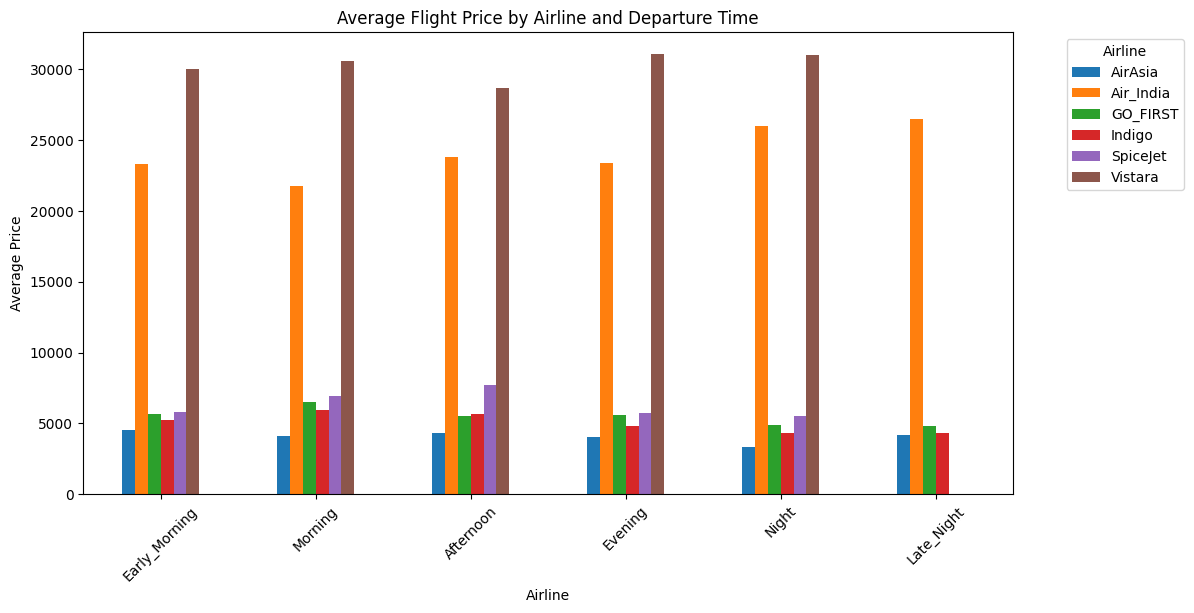

In [54]:
avg_price_pivot = avg_price_pivot.T
avg_price_pivot.plot(kind='bar', figsize=(12,6))
plt.title("Average Flight Price by Airline and Departure Time")
plt.ylabel("Average Price")
plt.xlabel("Airline")
plt.xticks(rotation=45)
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




             Cheapest Most Expensive
airline                             
AirAsia         Night  Early_Morning
Air_India     Morning     Late_Night
GO_FIRST   Late_Night        Morning
Indigo     Late_Night        Morning
SpiceJet        Night      Afternoon
Vistara     Afternoon        Evening


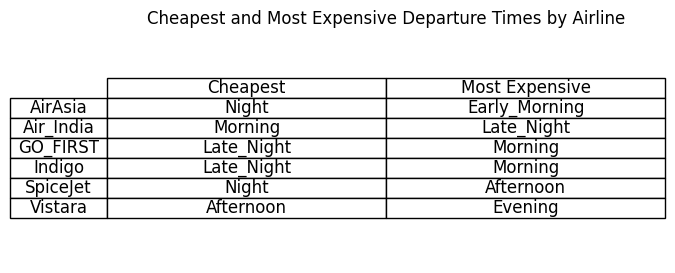

In [64]:
avg_price_pivot = avg_price_pivot.T
summary = pd.DataFrame({
    'Cheapest': avg_price_pivot.idxmin(axis=1),
    'Most Expensive': avg_price_pivot.idxmax(axis=1)
})
print(summary)

fig, ax = plt.subplots(figsize=(6,3))
ax.axis('off')  # hide axes

# Create table
tbl = ax.table(
    cellText=summary.values,
    rowLabels=summary.index,
    colLabels=summary.columns,
    cellLoc='center',
    rowLoc='center',
    loc='center'
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.2)

plt.title("Cheapest and Most Expensive Departure Times by Airline")
plt.show()

In [3]:
#time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'] 
airlines_flights_df['arrival_time'] = pd.Categorical(
    airlines_flights_df['arrival_time'],
    categories=time_order,
    ordered=True
)

arrival_avg_price_pivot = airlines_flights_df.pivot_table(
    index='airline',              # rows
    columns='arrival_time',      # columns
    values='price',               # values to aggregate
    aggfunc='mean'                # aggregation function
)
print(arrival_avg_price_pivot)

arrival_time  Early_Morning       Morning     Afternoon       Evening  \
airline                                                                 
AirAsia         3632.676617   3846.900653   4206.467836   4539.570963   
Air_India      18805.551542  22792.180401  23426.571700  24459.593397   
GO_FIRST        5537.433272   5281.059399   5511.206937   6022.345547   
Indigo          4107.122586   4558.313037   5458.553278   5914.292555   
SpiceJet        5348.022191   5777.899010   7116.303318   7465.200285   
Vistara        28597.738475  30180.664694  27905.873134  31225.269687   

arrival_time         Night    Late_Night  
airline                                   
AirAsia        4320.171700   3828.437410  
Air_India     23683.386323  28014.163158  
GO_FIRST       5808.054728   5306.723182  
Indigo         5371.779781   4989.383792  
SpiceJet       5898.403658   5911.436404  
Vistara       30773.372570  29699.180243  


C:\Users\ericz\AppData\Local\Temp\ipykernel_16300\476431965.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  arrival_avg_price_pivot = airlines_flights_df.pivot_table(


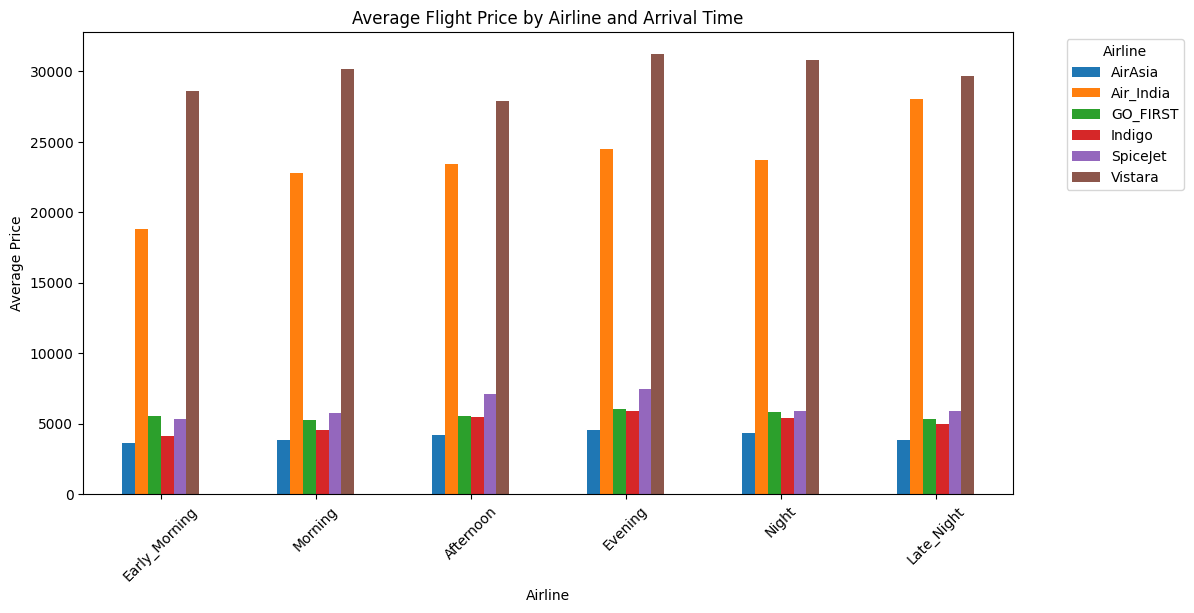

In [4]:
arrival_avg_price_pivot = arrival_avg_price_pivot.T
arrival_avg_price_pivot.plot(kind='bar', figsize=(12,6))
plt.title("Average Flight Price by Airline and Arrival Time")
plt.ylabel("Average Price")
plt.xlabel("Airline")
plt.xticks(rotation=45)
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

                Cheapest Most Expensive
airline                                
AirAsia    Early_Morning        Evening
Air_India  Early_Morning     Late_Night
GO_FIRST         Morning        Evening
Indigo     Early_Morning        Evening
SpiceJet   Early_Morning        Evening
Vistara        Afternoon        Evening


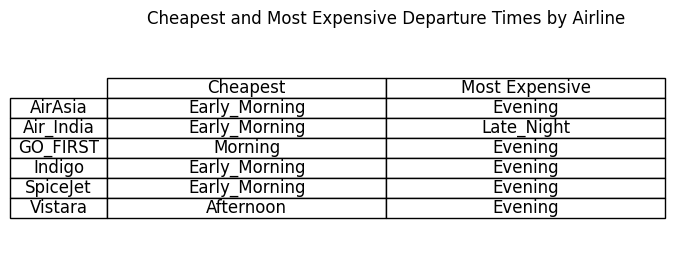

In [5]:
arrival_avg_price_pivot = arrival_avg_price_pivot.T
summary = pd.DataFrame({
    'Cheapest': arrival_avg_price_pivot.idxmin(axis=1),
    'Most Expensive': arrival_avg_price_pivot.idxmax(axis=1)
})
print(summary)

fig, ax = plt.subplots(figsize=(6,3))
ax.axis('off')  # hide axes

# Create table
tbl = ax.table(
    cellText=summary.values,
    rowLabels=summary.index,
    colLabels=summary.columns,
    cellLoc='center',
    rowLoc='center',
    loc='center'
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.2)

plt.title("Cheapest and Most Expensive Departure Times by Airline")
plt.show()

In [13]:
city_order = ['Mumbai', 'Delhi', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'] 
airlines_flights_df['source_city'] = pd.Categorical(
    airlines_flights_df['source_city'],
    categories=city_order,
    ordered=True
)

source_avg_price_pivot = airlines_flights_df.pivot_table(
    index='airline',              # rows
    columns='source_city',      # columns
    values='price',               # values to aggregate
    aggfunc='mean'                # aggregation function
)
print(source_avg_price_pivot)

source_city        Mumbai         Delhi     Bangalore       Kolkata  \
airline                                                               
AirAsia       3698.312960   4514.854798   4222.787158   4504.940615   
Air_India    22540.778419  21899.890758  24874.431796  25233.867742   
GO_FIRST      5421.236351   5742.409679   5492.290574   6638.820334   
Indigo        5371.185985   5386.570134   5230.785311   6223.829221   
SpiceJet      6101.956747   6084.649762   6184.534661   6852.890601   
Vistara      31522.101390  28938.500342  30834.436629  32794.276565   

source_city     Hyderabad       Chennai  
airline                                  
AirAsia       3359.273319   3243.964619  
Air_India    22458.063853  25415.500908  
GO_FIRST      4958.293131   5403.972847  
Indigo        4774.240708   4827.233916  
SpiceJet      6189.731928   5401.044299  
Vistara      27791.447325  30401.842703  


C:\Users\ericz\AppData\Local\Temp\ipykernel_16300\3242300386.py:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  source_avg_price_pivot = airlines_flights_df.pivot_table(


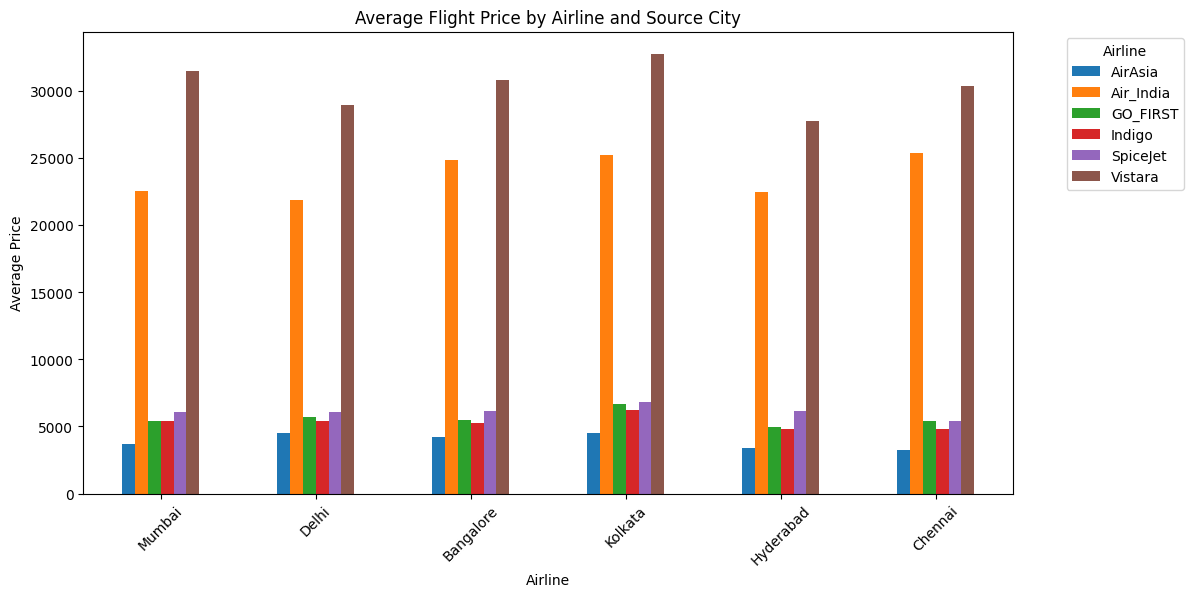

In [18]:
source_avg_price_pivot = source_avg_price_pivot.T
source_avg_price_pivot.plot(kind='bar', figsize=(12,6))
plt.title("Average Flight Price by Airline and Source City")
plt.ylabel("Average Price")
plt.xlabel("Airline")
plt.xticks(rotation=45)
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

            Cheapest Most Expensive
airline                            
AirAsia      Chennai          Delhi
Air_India      Delhi        Chennai
GO_FIRST   Hyderabad        Kolkata
Indigo     Hyderabad        Kolkata
SpiceJet     Chennai        Kolkata
Vistara    Hyderabad        Kolkata


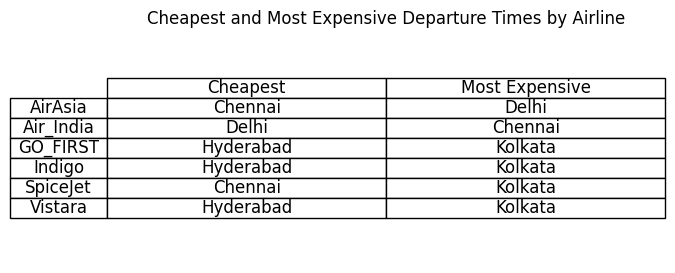

In [20]:
source_avg_price_pivot = source_avg_price_pivot.T
summary = pd.DataFrame({
    'Cheapest': source_avg_price_pivot.idxmin(axis=1),
    'Most Expensive': source_avg_price_pivot.idxmax(axis=1)
})
print(summary)

fig, ax = plt.subplots(figsize=(6,3))
ax.axis('off')  # hide axes

# Create table
tbl = ax.table(
    cellText=summary.values,
    rowLabels=summary.index,
    colLabels=summary.columns,
    cellLoc='center',
    rowLoc='center',
    loc='center'
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.2, 1.2)

plt.title("Cheapest and Most Expensive Departure Times by Airline")
plt.show()